In [1]:
!pip install smogn

In [2]:
#Imports
import pandas as pd
import requests
import matplotlib.pyplot as plt
import json
import numpy as np
from pandas.api.types import is_string_dtype
import os
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
import pandas as pd
%matplotlib inline
plt.rcParams['font.size'] = 24
from IPython.core.pylabtools import figsize
from sklearn.preprocessing import StandardScaler,Normalizer,FunctionTransformer,QuantileTransformer,PowerTransformer
from sklearn import model_selection
from sklearn.model_selection import RepeatedKFold
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression,HuberRegressor,Lasso,BayesianRidge,Ridge
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingRegressor, BaggingRegressor, AdaBoostRegressor
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
import warnings
from sklearn.svm import SVR
import statsmodels.api as sm
import re

In [3]:
import smogn

In [4]:
data=pd.read_csv('final_clean_2020_no_base.csv')  

In [17]:
data.columns

Index(['Unnamed: 0', 'property_id', 'property_name', 'parent_property_id',
       'parent_property_name', 'year_ending', 'nyc_borough_block_and_lot_bbl',
       'nyc_building_identification_number_bin', 'address_1', 'city',
       'postcode', 'primary_property_type_self_selected',
       'primary_property_type_portfolio_manager_calculated',
       'list_of_all_property_use_types_at_property',
       'largest_property_use_type', 'year_built', 'construction_status',
       'number_of_buildings', 'occupancy', 'metered_areas_energy',
       'metered_areas_water', 'score', 'energy_star_certification_eligibility',
       'weather_normalized_site_electricity_intensity_kwh_ft',
       'weather_normalized_site_natural_gas_intensity_therms_ft',
       'electricity_use_grid_purchase_and_generated_from_onsite_renewable_systems_kwh',
       'total_ghg_emissions_intensity_kgco2e_ft',
       'direct_ghg_emissions_intensity_kgco2e_ft',
       'egrid_output_emissions_rate_kgco2e_mbtu',
       'avoided_

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28067 entries, 0 to 28066
Data columns (total 70 columns):
 #   Column                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                         --------------  -----  
 0   Unnamed: 0                                                                                                     28067 non-null  int64  
 1   property_id                                                                                                    28067 non-null  float64
 2   property_name                                                                                                  28067 non-null  object 
 3   parent_property_id                                                                                             28067 non-null  object 
 4   parent_property_name                          

In [7]:
numeric_subset = data.select_dtypes('number')
numeric_subset.columns

Index(['Unnamed: 0', 'property_id', 'year_built', 'number_of_buildings',
       'occupancy', 'score',
       'weather_normalized_site_electricity_intensity_kwh_ft',
       'weather_normalized_site_natural_gas_intensity_therms_ft',
       'electricity_use_grid_purchase_and_generated_from_onsite_renewable_systems_kwh',
       'total_ghg_emissions_intensity_kgco2e_ft',
       'direct_ghg_emissions_intensity_kgco2e_ft',
       'egrid_output_emissions_rate_kgco2e_mbtu',
       'avoided_emissions_offsite_green_power_metric_tons_co2e',
       'percent_of_electricity_that_is_green_power',
       'multifamily_housing_number_of_bedrooms_density_number_per_1_000_sq_ft',
       'multifamily_housing_number_of_residential_living_units_in_a_high_rise_building_10_or_more_stories',
       'multifamily_housing_total_number_of_residential_living_units_density_number_per_1_000_sq_ft',
       'multifamily_housing_number_of_residential_living_units_in_a_high_rise_building_density_number_per_1_000_sq_ft',
  

In [6]:
import datetime as dt
data['year_ending'] = pd.to_datetime(data['year_ending'])

df2020 = data[data['year_ending'].dt.year == 2020]


In [7]:
df2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26704 entries, 0 to 26703
Data columns (total 69 columns):
 #   Column                                                                                                         Non-Null Count  Dtype         
---  ------                                                                                                         --------------  -----         
 0   Unnamed: 0                                                                                                     26704 non-null  int64         
 1   property_id                                                                                                    26704 non-null  float64       
 2   property_name                                                                                                  26704 non-null  object        
 3   parent_property_id                                                                                             26704 non-null  object        
 4   pare

# Find ing model by property type

In [8]:
data['postcode'] = data['postcode'].str[:5]

In [9]:
zipcode=data.groupby(['postcode']).count().sort_values('property_id', ascending=False)

zipcode

,Unnamed: 0,property_id,property_name,parent_property_id,parent_property_name,year_ending,nyc_borough_block_and_lot_bbl,nyc_building_identification_number_bin,address_1,city,...,number_of_active_energy_meters_not_used_to_compute_metrics,number_of_active_it_meters,generation_date,release_date,borough,community_board,census_tract,nta,longitude,latitude
postcode,,,,,,,,,,,,,,,,,,,,,
10025,499,499,499,499,499,499,499,499,499,499,...,499,499,499,499,487,499,499,487,499,499
11226,496,496,496,496,496,496,496,496,496,496,...,496,496,496,496,488,496,496,488,496,496
10011,471,471,471,471,471,471,470,470,471,471,...,471,471,471,471,459,471,471,459,471,471
11101,461,461,461,461,461,461,460,458,461,461,...,461,461,461,461,442,461,461,441,461,461
10452,455,455,455,455,455,455,455,454,455,455,...,455,455,455,455,444,455,455,444,455,455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10367,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,0,1,1,0,1,1
10315,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
10285,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [63]:
prop=data.groupby(['largest_property_use_type']).count()
prop

,Unnamed: 0,property_id,property_name,parent_property_id,parent_property_name,year_ending,nyc_borough_block_and_lot_bbl,nyc_building_identification_number_bin,address_1,city,...,number_of_active_energy_meters_not_used_to_compute_metrics,number_of_active_it_meters,generation_date,release_date,borough,community_board,census_tract,nta,longitude,latitude
largest_property_use_type,,,,,,,,,,,,,,,,,,,,,
Education,1617,1617,1617,1617,1617,1617,1616,1616,1617,1617,...,1617,1617,1617,1617,1584,1617,1617,1584,1617,1617
Food Sales & Service,89,89,89,89,89,89,89,89,89,89,...,89,89,89,89,88,89,89,88,89,89
Healthcare,122,122,122,122,122,122,122,122,122,122,...,122,122,122,122,114,122,122,113,122,122
Lodging/Residential,19564,19564,19564,19564,19564,19564,19536,19518,19564,19564,...,19564,19564,19564,19564,18955,19564,19564,18953,19564,19564
Office,2541,2541,2541,2541,2541,2541,2530,2527,2541,2541,...,2541,2541,2541,2541,2454,2541,2541,2454,2541,2541
Public Assembly,217,217,217,217,217,217,217,217,217,217,...,217,217,217,217,205,217,217,205,217,217
Public Services,25,25,25,25,25,25,25,25,25,25,...,25,25,25,25,25,25,25,25,25,25
Retail Store,331,331,331,331,331,331,327,326,331,331,...,331,331,331,331,319,331,331,318,331,331
Warehouse/Storage,664,664,664,664,664,664,658,649,664,664,...,664,664,664,664,631,664,664,631,664,664


In [12]:
data['property_id'] = data['property_id'].astype(int)

In [14]:
identifiers=data[['property_id','property_name','postcode','largest_property_use_type','borough','longitude','latitude']]




In [15]:
identifiers.to_csv('identifiers.csv')

In [64]:
umm=data.groupby(['largest_property_use_type','borough']).count()

In [65]:
data['score']=data['score'].astype('int')

In [66]:
data['score'][:10]

0    83
1    11
2    74
3    73
4    53
5    77
6    54
7    52
8    76
9    87
Name: score, dtype: int64

In [67]:
zc=data.loc[data['postcode'].isin(['10003'])]#,'10025','10001','10452'
res=data[data['largest_property_use_type']=='Lodging/Residential']
war=data[data['largest_property_use_type']=='Warehouse/Storage']
off=data[data['largest_property_use_type']=='Office']

In [43]:
edu=data[data['largest_property_use_type']=='Education']

In [68]:
res.groupby(['borough']).count()

,Unnamed: 0,property_id,property_name,parent_property_id,parent_property_name,year_ending,nyc_borough_block_and_lot_bbl,nyc_building_identification_number_bin,address_1,city,...,number_of_active_energy_meters_used_to_compute_metrics,number_of_active_energy_meters_not_used_to_compute_metrics,number_of_active_it_meters,generation_date,release_date,community_board,census_tract,nta,longitude,latitude
borough,,,,,,,,,,,,,,,,,,,,,
BRONX,4047,4047,4047,4047,4047,4047,4044,4042,4047,4047,...,4047,4047,4047,4047,4047,4047,4047,4047,4047,4047
BROOKLYN,4772,4772,4772,4772,4772,4772,4767,4762,4772,4772,...,4772,4772,4772,4772,4772,4772,4772,4772,4772,4772
MANHATTAN,7167,7167,7167,7167,7167,7167,7160,7153,7167,7167,...,7167,7167,7167,7167,7167,7167,7167,7166,7167,7167
QUEENS,2797,2797,2797,2797,2797,2797,2789,2785,2797,2797,...,2797,2797,2797,2797,2797,2797,2797,2796,2797,2797
STATEN IS,172,172,172,172,172,172,172,172,172,172,...,172,172,172,172,172,172,172,172,172,172


In [69]:
off_data=off[off['borough']=='MANHATTAN']

In [70]:
res_data=res[res['borough']=='BRONX']

In [17]:
edu_data=edu[edu['borough']=='BROOKLYN']

In [18]:
edu_data.shape

(526, 70)

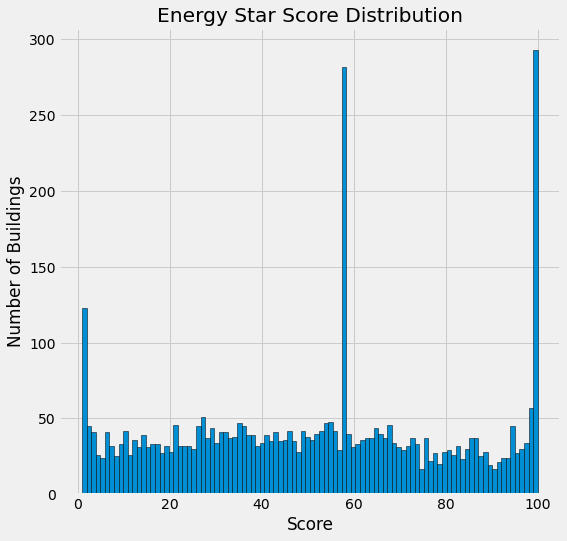

In [71]:
figsize(8, 8)

# Histogram of the Energy Star Score
plt.style.use('fivethirtyeight')
plt.hist(res_data['score'].dropna(), bins = 100, edgecolor = 'k');
plt.xlabel('Score'); plt.ylabel('Number of Buildings'); 
plt.title('Energy Star Score Distribution');

In [ ]:
# ## specify phi relevance values
# rg_mtrx = [

#     [35000,  1, 0],  ## over-sample ("minority")
#     [125000, 0, 0],  ## under-sample ("majority")
#     [200000, 0, 0],  ## under-sample
#     [250000, 0, 0],  ## under-sample
# ]

In [58]:
# ## conduct smogn
# res_smogn = smogn.smoter(
    
#     data = res_data,  ## pandas dataframe
#     y = 'score',  ## string ('header name')
#     k = 99,                    ## positive integer (k < n)
#     samp_method = 'extreme',  ## string ('balance' or 'extreme')
#     rel_method = 'manual'

#     ## phi relevance arguments
#     rel_thres = 0.80,         ## positive real number (0 < R < 1)
#     rel_method = 'auto',      ## string ('auto' or 'manual')
#     rel_xtrm_type = 'high',   ## string ('low' or 'both' or 'high')
#     rel_coef = 2.25            ## positive real number (0 < R)
# )

ValueError: redefine phi relevance function: all points are 1

In [72]:
#remove outliers
def cap_data(df):
    for col in df.columns:
        if (((df[col].dtype)=='float64') | ((df[col].dtype)=='int64')):
            percentiles = df[col].quantile([0.01,0.99]).values
            df[col][df[col] <= percentiles[0]] = percentiles[0]
            df[col][df[col] >= percentiles[1]] = percentiles[1]
        else:
            df[col]=df[col]
    return df



In [73]:
res_man=cap_data(res_data)
#edu_bro=cap_data(edu_data)
#off_man=cap_data(off_data)

/var/folders/rf/gzndr1_13zv5fmzyqjdy1srw0000gn/T/ipykernel_1174/3831115390.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][df[col] <= percentiles[0]] = percentiles[0]
/var/folders/rf/gzndr1_13zv5fmzyqjdy1srw0000gn/T/ipykernel_1174/3831115390.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][df[col] <= percentiles[0]] = percentiles[0]
/var/folders/rf/gzndr1_13zv5fmzyqjdy1srw0000gn/T/ipykernel_1174/3831115390.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

/var/folders/rf/gzndr1_13zv5fmzyqjdy1srw0000gn/T/ipykernel_1174/3831115390.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][df[col] <= percentiles[0]] = percentiles[0]
/var/folders/rf/gzndr1_13zv5fmzyqjdy1srw0000gn/T/ipykernel_1174/3831115390.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][df[col] >= percentiles[1]] = percentiles[1]
/var/folders/rf/gzndr1_13zv5fmzyqjdy1srw0000gn/T/ipykernel_1174/3831115390.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

/var/folders/rf/gzndr1_13zv5fmzyqjdy1srw0000gn/T/ipykernel_1174/3831115390.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][df[col] <= percentiles[0]] = percentiles[0]
/var/folders/rf/gzndr1_13zv5fmzyqjdy1srw0000gn/T/ipykernel_1174/3831115390.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][df[col] <= percentiles[0]] = percentiles[0]
/var/folders/rf/gzndr1_13zv5fmzyqjdy1srw0000gn/T/ipykernel_1174/3831115390.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

/var/folders/rf/gzndr1_13zv5fmzyqjdy1srw0000gn/T/ipykernel_1174/3831115390.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][df[col] >= percentiles[1]] = percentiles[1]
/var/folders/rf/gzndr1_13zv5fmzyqjdy1srw0000gn/T/ipykernel_1174/3831115390.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][df[col] <= percentiles[0]] = percentiles[0]
/var/folders/rf/gzndr1_13zv5fmzyqjdy1srw0000gn/T/ipykernel_1174/3831115390.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

/var/folders/rf/gzndr1_13zv5fmzyqjdy1srw0000gn/T/ipykernel_1174/3831115390.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][df[col] >= percentiles[1]] = percentiles[1]
/var/folders/rf/gzndr1_13zv5fmzyqjdy1srw0000gn/T/ipykernel_1174/3831115390.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col]=df[col]
/var/folders/rf/gzndr1_13zv5fmzyqjdy1srw0000gn/T/ipykernel_1174/3831115390.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

/var/folders/rf/gzndr1_13zv5fmzyqjdy1srw0000gn/T/ipykernel_1174/3831115390.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][df[col] <= percentiles[0]] = percentiles[0]
/var/folders/rf/gzndr1_13zv5fmzyqjdy1srw0000gn/T/ipykernel_1174/3831115390.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][df[col] >= percentiles[1]] = percentiles[1]
/var/folders/rf/gzndr1_13zv5fmzyqjdy1srw0000gn/T/ipykernel_1174/3831115390.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

In [49]:
res_data.head()

,Unnamed: 0,property_id,property_name,parent_property_id,parent_property_name,year_ending,nyc_borough_block_and_lot_bbl,nyc_building_identification_number_bin,address_1,city,...,number_of_active_energy_meters_not_used_to_compute_metrics,number_of_active_it_meters,generation_date,release_date,borough,community_board,census_tract,nta,longitude,latitude
1197,1453.92,2609681.34,800 Grand Concourse,Not Applicable: Standalone Property,Not Applicable: Standalone Property,2020-12-31T00:00:00.000,2024580090,2002791,800 Grand Concourse,Bronx,...,0,0,2021-05-31T21:53:29.000,2021-05-31T21:54:06.000,BRONX,204.0,5902.0,East Concourse-Concourse Village,-73.923522,40.825315
1229,1453.92,2609681.34,Sycamore Row,Not Applicable: Standalone Property,Not Applicable: Standalone Property,2020-12-31T00:00:00.000,2-02867-0108,2008513,1740 Grand avenue,Bronx,...,0,0,2021-07-29T11:39:16.000,2021-07-29T11:39:59.000,BRONX,205.0,217.0,University Heights-Morris Heights,-73.913511,40.849226
1241,1453.92,2609681.34,793-797 Garden HDFC,Not Applicable: Standalone Property,Not Applicable: Standalone Property,2020-12-31T00:00:00.000,2-03100-0001,2012784,795 Garden Street,Bronx,...,0,0,2021-05-28T15:41:36.000,2021-05-28T15:45:56.000,BRONX,206.0,393.0,Belmont,-73.883167,40.849259
1242,1453.92,2609681.34,590 Five Corp,Not Applicable: Standalone Property,Not Applicable: Standalone Property,2020-12-31T00:00:00.000,2-02614-0061,2004293,595 E. 167th Street,Bronx,...,0,0,2021-05-28T15:41:36.000,2021-05-28T15:45:56.000,BRONX,203.0,185.0,Morrisania-Melrose,-73.904360,40.828534
1243,1453.92,2609681.34,Grand Slam Corp,Not Applicable: Standalone Property,Not Applicable: Standalone Property,2020-12-31T00:00:00.000,2-02985-0038,2010622,1956 Crotona Parkway,Bronx,...,0,0,2021-05-10T13:08:53.000,2021-05-10T13:09:26.000,BRONX,206.0,359.0,East Tremont,-73.885315,40.842378


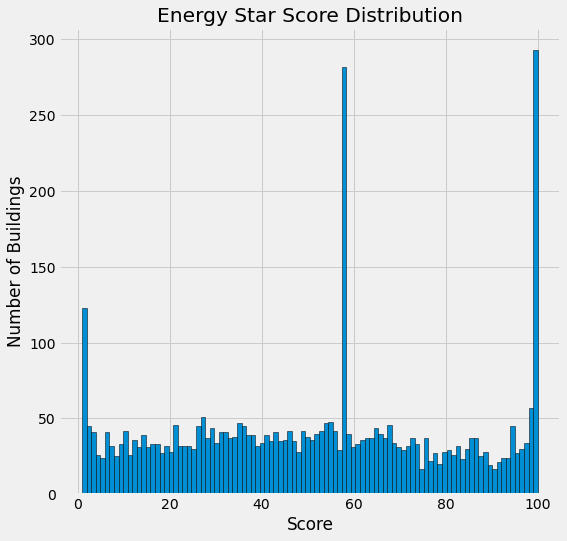

In [25]:
figsize(8, 8)

# Histogram of the Energy Star Score
plt.style.use('fivethirtyeight')
plt.hist(res_man['score'].dropna(), bins = 100, edgecolor = 'k');
plt.xlabel('Score'); plt.ylabel('Number of Buildings'); 
plt.title('Energy Star Score Distribution');

In [74]:
# Select the numeric columns
numeric_subset = res_man.select_dtypes('number')


# # Create columns with square root and log of numeric columns
# for col in numeric_subset.columns:
#     # Skip the Energy Star Score column
#     if col == 'score':
#         next
#     else:
#         numeric_subset['sqrt_' + col] = np.sqrt(numeric_subset[col])
#         numeric_subset['log_' + col] = np.log(numeric_subset[col])

# Select the categorical columns
#categorical_subset = war_data[[ 'borough']]#'borough',

# One hot encode
#categorical_subset = pd.get_dummies(categorical_subset)

# Join the two dataframes using concat
# Make sure to use axis = 1 to perform a column bind
features = numeric_subset #pd.concat([numeric_subset, categorical_subset], axis = 1)

# Drop buildings without an energy star score
features = features.dropna(subset = ['score'])

# Find correlations with the score 
correlations = features.corr()['score'].dropna().sort_values()

In [75]:
# Replace the inf and -inf with nan (required for later imputation)
features = features.replace({np.inf: np.nan, -np.inf: np.nan})

In [76]:
# fill in nan with mean
for i in features.columns[4:]:
    mean_value=features[i].mean()
    features[i].fillna(value=mean_value, inplace=True)

In [77]:
features.columns

Index(['Unnamed: 0', 'property_id', 'year_built', 'number_of_buildings',
       'occupancy', 'score',
       'weather_normalized_site_electricity_intensity_kwh_ft',
       'weather_normalized_site_natural_gas_intensity_therms_ft',
       'electricity_use_grid_purchase_and_generated_from_onsite_renewable_systems_kwh',
       'total_ghg_emissions_intensity_kgco2e_ft',
       'direct_ghg_emissions_intensity_kgco2e_ft',
       'egrid_output_emissions_rate_kgco2e_mbtu',
       'avoided_emissions_offsite_green_power_metric_tons_co2e',
       'percent_of_electricity_that_is_green_power',
       'multifamily_housing_number_of_bedrooms_density_number_per_1_000_sq_ft',
       'multifamily_housing_number_of_residential_living_units_in_a_high_rise_building_10_or_more_stories',
       'multifamily_housing_total_number_of_residential_living_units_density_number_per_1_000_sq_ft',
       'multifamily_housing_number_of_residential_living_units_in_a_high_rise_building_density_number_per_1_000_sq_ft',
  

cols=['source_eui_kbtu_ft','site_eui_kbtu_ft','weather_normalized_site','score']

import matplotlib.pyplot as plt
from mlxtend.plotting import scatterplotmatrix
scatterplotmatrix(features[cols].values, figsize=(10, 8), 
                  names=cols, alpha=0.5)
plt.tight_layout()
#plt.savefig('images/10_03.png', dpi=300)
plt.show()


In [78]:
features.drop(['Unnamed: 0'], axis=1,inplace=True)

In [79]:
features=features[['score', 'property_id', 'year_built', 'number_of_buildings',
       'occupancy', 
       'weather_normalized_site_electricity_intensity_kwh_ft',
       'weather_normalized_site_natural_gas_intensity_therms_ft',
       'electricity_use_grid_purchase_and_generated_from_onsite_renewable_systems_kwh',
       'total_ghg_emissions_intensity_kgco2e_ft',
       'direct_ghg_emissions_intensity_kgco2e_ft',
       'egrid_output_emissions_rate_kgco2e_mbtu',
       'avoided_emissions_offsite_green_power_metric_tons_co2e',
       'percent_of_electricity_that_is_green_power',
       'multifamily_housing_number_of_bedrooms_density_number_per_1_000_sq_ft',
       'multifamily_housing_number_of_residential_living_units_in_a_high_rise_building_10_or_more_stories',
       'multifamily_housing_total_number_of_residential_living_units_density_number_per_1_000_sq_ft',
       'multifamily_housing_number_of_residential_living_units_in_a_high_rise_building_density_number_per_1_000_sq_ft',
       'multifamily_housing_number_of_residential_living_units_in_a_mid_rise_building_5_9_stories',
       'multifamily_housing_number_of_residential_living_units_in_a_mid_rise_building_density_number_per_1_000_sq_ft',
       'multifamily_housing_percent_that_can_be_cooled',
       'multifamily_housing_percent_that_can_be_heated',
       'water_use_all_water_sources_kgal',
       'number_of_active_energy_meters_used_to_compute_metrics',
       'number_of_active_energy_meters_not_used_to_compute_metrics',
       'number_of_active_it_meters', 'community_board', 'census_tract',
       'longitude', 'latitude']]

In [80]:
len(features.columns)

29

In [57]:
#letter grade
feat=features.copy()
feat['letters']=pd.cut(x=features['score'], bins=[0,55,70,85,100], labels=['D','C','B','A'])

In [83]:
feat.tail()

,score,property_id,largest_property_use_type_gross_floor_area_ft,year_built,number_of_buildings,occupancy,weather_normalized_site_electricity_kwh,direct_ghg_emissions_metric_tons_co2e,indirect_ghg_emissions_metric_tons_co2e,egrid_output_emissions_rate_kgco2e_mbtu,...,multifamily_housing_percent_that_can_be_heated,water_use_all_water_sources_kgal,number_of_active_energy_meters_used_to_compute_metrics,number_of_active_energy_meters_not_used_to_compute_metrics,number_of_active_it_meters,community_board,census_tract,longitude,latitude,letters
28052,95,16325377.98,128054.0,1909.46,1,100,872669.604535,788.900000,0.0,79.5,...,95.784477,4594.425778,1.0,0,0,209.0,92.0,-73.854481,40.833200,A
28053,95,16325377.98,126054.0,1928.00,1,100,872669.604535,788.900000,0.0,79.5,...,95.784477,4594.425778,1.0,0,0,209.0,92.0,-73.854481,40.833200,A
28054,58,16325377.98,126054.0,1928.00,1,100,872669.604535,264.657522,0.0,79.5,...,95.784477,4594.425778,1.0,0,0,209.0,92.0,-73.854481,40.833200,C
28055,95,16325377.98,126054.0,1928.00,1,100,872669.604535,788.900000,0.0,79.5,...,95.784477,4594.425778,1.0,0,0,209.0,92.0,-73.854481,40.833200,A
28061,100,16325377.98,31396.0,2018.00,1,100,46826.528000,0.000000,3.5,79.5,...,100.000000,4594.425778,2.0,0,0,207.0,411.0,-73.888230,40.873648,A


In [81]:
features.to_csv('res_bron_2020_no_base.csv')
#feat.to_csv('res_bron_2020_cat_no_fin.csv')

In [231]:
sc=StandardScaler()
standard=features.copy()
sub=standard.select_dtypes(include=[np.number])
standard[sub.columns[1:22]]=sc.fit_transform(standard[sub.columns[1:22]])
standard.head()

,score,largest_property_use_type_gross_floor_area_ft,year_built,number_of_buildings,occupancy,site_eui_kbtu_ft,weather_normalized_site_electricity_intensity_kwh_ft,green_power_offsite_kwh,egrid_output_emissions_rate_kgco2e_mbtu,percent_of_electricity_that_is_green_power,...,number_of_active_it_meters,community_board,census_tract,longitude,latitude,borough_BRONX,borough_BROOKLYN,borough_MANHATTAN,borough_QUEENS,borough_STATEN IS
0,83.0,1.992519,1.296235,0.0,-2.640305,-0.740676,-0.258958,0.0,0.0,0.0,...,0.0,-0.576584,-0.242191,-73.982826,40.756631,0,0,1,0,0
1,74.0,1.564875,1.509828,0.0,0.091045,-0.286305,-0.054608,0.0,0.0,0.0,...,0.0,-0.576584,-0.241453,-73.982504,40.758310,0,0,1,0,0
2,73.0,0.797919,0.655458,0.0,0.432464,0.171245,-0.017453,0.0,0.0,0.0,...,0.0,-0.567521,-0.245757,-73.972753,40.753074,0,0,1,0,0
3,53.0,2.973632,1.814960,0.0,0.432464,0.434971,0.725640,0.0,0.0,0.0,...,0.0,-0.576584,-0.242191,-73.986244,40.756181,0,0,1,0,0
4,76.0,2.089433,1.662394,0.0,0.432464,0.133116,0.651330,0.0,0.0,0.0,...,0.0,-0.576584,-0.244281,-73.973798,40.757450,0,0,1,0,0


In [232]:
sc=Normalizer()
normalized=features.copy()
sub=normalized.select_dtypes(include=[np.number])
normalized[sub.columns[1:22]]=sc.fit_transform(normalized[sub.columns[1:22]])
normalized.head()

,score,largest_property_use_type_gross_floor_area_ft,year_built,number_of_buildings,occupancy,site_eui_kbtu_ft,weather_normalized_site_electricity_intensity_kwh_ft,green_power_offsite_kwh,egrid_output_emissions_rate_kgco2e_mbtu,percent_of_electricity_that_is_green_power,...,number_of_active_it_meters,community_board,census_tract,longitude,latitude,borough_BRONX,borough_BROOKLYN,borough_MANHATTAN,borough_QUEENS,borough_STATEN IS
0,83.0,0.999983,0.002908,0.000001,0.000081,0.000061,0.000014,0.0,0.000117,0.0,...,0.0,0.000154,0.000175,-73.982826,40.756631,0,0,1,0,0
1,74.0,0.999976,0.003444,0.000002,0.000164,0.000097,0.000018,0.0,0.000138,0.0,...,0.0,0.000182,0.000216,-73.982504,40.758310,0,0,1,0,0
2,73.0,0.999949,0.005017,0.000003,0.000256,0.000180,0.000028,0.0,0.000203,0.0,...,0.0,0.000271,0.000230,-73.972753,40.753074,0,0,1,0,0
3,53.0,0.999991,0.002172,0.000001,0.000109,0.000086,0.000016,0.0,0.000086,0.0,...,0.0,0.000114,0.000129,-73.986244,40.756181,0,0,1,0,0
4,76.0,0.999823,0.002827,0.000001,0.000142,0.000098,0.000020,0.0,0.000113,0.0,...,0.0,0.000149,0.000145,-73.973798,40.757450,0,0,1,0,0


In [233]:
X=features.drop('score', axis=1)
y=features['score']
X_n=normalized.drop('score', axis=1)
y_n=normalized['score']
X_r=standard.drop('score', axis=1)
y_r=standard['score']

In [142]:
# X=features.drop('score', axis=1)
# y=feat['score']
# X_n=normalized.drop('score', axis=1)
# y_n=normalized['score']
# X_r=standard.drop('score', axis=1)
# y_r=standard['score']

In [235]:
# Split into 80% training and 20% testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=1)
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(1372, 28)
(344, 28)
(429, 28)
(1372,)
(344,)
(429,)


In [236]:
# Standardized
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_r, y_r, test_size = 0.2, random_state = 42)
X_train_r, X_val_r, y_train_r, y_val_r = train_test_split(X_train_r, y_train_r, test_size=0.20, random_state=1)


In [237]:
# normalized
X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(X_n, y_n, test_size = 0.2, random_state = 42)
X_train_n, X_val_n, y_train_n, y_val_n = train_test_split(X_train_n, y_train_n, test_size=0.20, random_state=1)


#PCA
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(dataPCA, y, test_size = 0.2, random_state = 42)
X_train_pca, X_val_pca, y_train_pca, y_val_pca = train_test_split(X_train_pca, y_train_pca, test_size=0.20, random_state=1)


In [39]:
from sklearn.model_selection import KFold

In [238]:
# Function to calculate mean absolute error
def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))
baseline_guess = np.median(y_train)

print('The baseline guess is a score of %0.2f' % baseline_guess)
print("Baseline Performance on the test set: MAE = %0.4f" % mae(y_test, baseline_guess))

The baseline guess is a score of 77.00
Baseline Performance on the test set: MAE = 17.8904


In [239]:
nam=['Ada Boost','Decision Tree','Gradient Boost', 'SVM', 'Random Forest']



In [79]:
mse_te1

[129.96523891595257,
 264.52941176470586,
 89.18400432825021,
 695.1920352042549,
 124.67841470588235]

In [240]:
def ada(X_train, X_val, y_train, y_val, X_test, y_test):
    
    # fit the regressor with val data
    regressor = AdaBoostRegressor() 
    regressor.fit(X_train, y_train)
    y_train_pred = regressor.predict(X_train)
    y_val_pred = regressor.predict(X_val)
    #fit test on extracted features 
    
    print('MAE train: %.3f, val: %.3f' % (mean_absolute_error(y_train, y_train_pred),mean_absolute_error(y_val, y_val_pred)))
    #print('MSE test: %.3f'  % mean_squared_error(y_test, y_test_pred))
    
    print('R^2 train: %.3f, val: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_val, y_val_pred)))
    #print('R^2 test: %.3f'% r2_score(y_test, y_test_pred))
    
#     mse_tr3.append(mean_squared_error(y_train, y_train_pred))
#     mse_te3.append(mean_squared_error(y_val, y_val_pred))
#     rsq_tr3.append(r2_score(y_train, y_train_pred))
#     rsq_te3.append(r2_score(y_val, y_val_pred))

In [258]:
def ada_h(X_train, X_val, y_train, y_val, X_test, y_test):
    
    params = {'learning_rate': 0.5, 'loss': 'exponential', 'n_estimators': 100}
    
    # fit the regressor with val data
    regressor = AdaBoostRegressor(**params) 
    regressor.fit(X_train, y_train)
    y_train_pred = regressor.predict(X_train)
    y_val_pred = regressor.predict(X_val)
    #fit test on extracted features 
    
    print('MAE train: %.3f, val: %.3f' % (mean_absolute_error(y_train, y_train_pred),mean_absolute_error(y_val, y_val_pred)))
    #print('MSE test: %.3f'  % mean_squared_error(y_test, y_test_pred))
    
    print('R^2 train: %.3f, val: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_val, y_val_pred)))
    #print('R^2 test: %.3f'% r2_score(y_test, y_test_pred))
    
#     mse_tr3.append(mean_squared_error(y_train, y_train_pred))
#     mse_te3.append(mean_squared_error(y_val, y_val_pred))
#     rsq_tr3.append(r2_score(y_train, y_train_pred))
#     rsq_te3.append(r2_score(y_val, y_val_pred))

#     feature_importances = regressor.feature_importances_
#     sorted_idxs = np.argsort(feature_importances)[:5]
#     poss = np.arange(sorted_idxs.shape[0]) + 0.5
#     fig = plt.figure(figsize=(6, 7))
#     plt.subplot(1, 2, 1)
#     plt.barh(poss, feature_importances[sorted_idxs], align="center")
#     plt.yticks(poss, np.array(features.columns)[sorted_idxs])
#     plt.title("Feature Importance (MDI)")    
    
    fig = plt.figure(figsize=(7, 6))

    plt.scatter(y_val_pred,  
                y_val_pred - y_val, 
                c='limegreen',
                edgecolor='white',
                marker='s', 
                s=35,
                alpha=0.9,
                label='Test data')
    plt.scatter(y_train_pred,  
                y_train_pred - y_train, 
                c='steelblue',
                edgecolor='white',
                marker='o', 
                s=35,
                alpha=0.7,
                label='Training data')
    plt.xlabel('Predicted values')
    plt.ylabel('Residuals')
    plt.legend(loc='upper left')
    plt.hlines(y=0, xmin=-10, xmax=120, lw=2, color='black')
    plt.xlim([-10, 120])
    plt.tight_layout()

    #plt.savefig('GBR.png', dpi=300)
    plt.show()    


In [221]:
def ada_hr(X_train, X_val, y_train, y_val, X_test, y_test):
    
    params = {'learning_rate': 0.5, 'loss': 'linear', 'n_estimators': 100}
    
    # fit the regressor with val data
    regressor = AdaBoostRegressor(**params) 
    regressor.fit(X_train, y_train)
    y_train_pred = regressor.predict(X_train)
    y_val_pred = regressor.predict(X_val)
    #fit test on extracted features 
    
    print('MAE train: %.3f, val: %.3f' % (mean_absolute_error(y_train, y_train_pred),mean_absolute_error(y_val, y_val_pred)))
    #print('MSE test: %.3f'  % mean_squared_error(y_test, y_test_pred))
    
    print('R^2 train: %.3f, val: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_val, y_val_pred)))
    #print('R^2 test: %.3f'% r2_score(y_test, y_test_pred))
    
#     mse_tr3.append(mean_squared_error(y_train, y_train_pred))
#     mse_te3.append(mean_squared_error(y_val, y_val_pred))
#     rsq_tr3.append(r2_score(y_train, y_train_pred))
#     rsq_te3.append(r2_score(y_val, y_val_pred))

#     feature_importances = regressor.feature_importances_
#     sorted_idxs = np.argsort(feature_importances)[:5]
#     poss = np.arange(sorted_idxs.shape[0]) + 0.5
#     fig = plt.figure(figsize=(6, 7))
#     plt.subplot(1, 2, 1)
#     plt.barh(poss, feature_importances[sorted_idxs], align="center")
#     plt.yticks(poss, np.array(features.columns)[sorted_idxs])
#     plt.title("Feature Importance (MDI)")    
    
#     fig = plt.figure(figsize=(7, 6))

#     plt.scatter(y_val_pred,  
#                 y_val_pred - y_val, 
#                 c='limegreen',
#                 edgecolor='white',
#                 marker='s', 
#                 s=35,
#                 alpha=0.9,
#                 label='Test data')
#     plt.scatter(y_train_pred,  
#                 y_train_pred - y_train, 
#                 c='steelblue',
#                 edgecolor='white',
#                 marker='o', 
#                 s=35,
#                 alpha=0.2,
#                 label='Training data')
#     plt.xlabel('Predicted values')
#     plt.ylabel('Residuals')
#     plt.legend(loc='upper left')
#     plt.hlines(y=0, xmin=-10, xmax=120, lw=2, color='black')
#     plt.xlim([-10, 120])
#     plt.tight_layout()

#     #plt.savefig('GBR.png', dpi=300)
#     plt.show()    


In [222]:
def ada_hn(X_train, X_val, y_train, y_val, X_test, y_test):
    
    params = {'learning_rate': 0.5, 'loss': 'square', 'n_estimators': 100}
    
    # fit the regressor with val data
    regressor = AdaBoostRegressor(**params) 
    regressor.fit(X_train, y_train)
    y_train_pred = regressor.predict(X_train)
    y_val_pred = regressor.predict(X_val)
    #fit test on extracted features 
    
    print('MSE train: %.3f, val: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_val, y_val_pred)))
    #print('MSE test: %.3f'  % mean_squared_error(y_test, y_test_pred))
    
    print('R^2 train: %.3f, val: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_val, y_val_pred)))
    #print('R^2 test: %.3f'% r2_score(y_test, y_test_pred))
    
#     mse_tr3.append(mean_squared_error(y_train, y_train_pred))
#     mse_te3.append(mean_squared_error(y_val, y_val_pred))
#     rsq_tr3.append(r2_score(y_train, y_train_pred))
#     rsq_te3.append(r2_score(y_val, y_val_pred))

#     feature_importances = regressor.feature_importances_
#     sorted_idxs = np.argsort(feature_importances)[:5]
#     poss = np.arange(sorted_idxs.shape[0]) + 0.5
#     fig = plt.figure(figsize=(6, 7))
#     plt.subplot(1, 2, 1)
#     plt.barh(poss, feature_importances[sorted_idxs], align="center")
#     plt.yticks(poss, np.array(features.columns)[sorted_idxs])
#     plt.title("Feature Importance (MDI)")    
    
#     fig = plt.figure(figsize=(7, 6))

#     plt.scatter(y_val_pred,  
#                 y_val_pred - y_val, 
#                 c='limegreen',
#                 edgecolor='white',
#                 marker='s', 
#                 s=35,
#                 alpha=0.9,
#                 label='Test data')
#     plt.scatter(y_train_pred,  
#                 y_train_pred - y_train, 
#                 c='steelblue',
#                 edgecolor='white',
#                 marker='o', 
#                 s=35,
#                 alpha=0.2,
#                 label='Training data')
#     plt.xlabel('Predicted values')
#     plt.ylabel('Residuals')
#     plt.legend(loc='upper left')
#     plt.hlines(y=0, xmin=-10, xmax=120, lw=2, color='black')
#     plt.xlim([-10, 120])
#     plt.tight_layout()

#     #plt.savefig('GBR.png', dpi=300)
#     plt.show()    


In [241]:
ada(X_train, X_val, y_train, y_val, X_test, y_test )

MAE train: 10.427, val: 10.934
R^2 train: 0.686, val: 0.653


In [242]:
ada(X_train_n, X_val_n, y_train_n, y_val_n, X_test_n, y_test_n )

MAE train: 12.867, val: 13.587
R^2 train: 0.542, val: 0.515


In [243]:
ada(X_train_r, X_val_r, y_train_r, y_val_r, X_test_r, y_test_r )

MAE train: 10.554, val: 10.750
R^2 train: 0.673, val: 0.661


MSE train: 41.896, val: 118.272
R^2 train: 0.955, val: 0.824


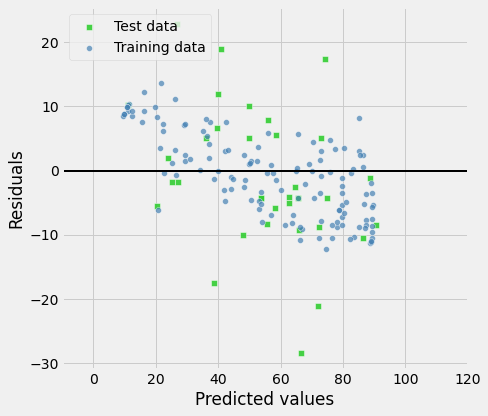

In [259]:
ada_h(X_train, X_val, y_train, y_val, X_test, y_test )

In [227]:
ada_hn(X_train_n, X_val_n, y_train_n, y_val_n, X_test_n, y_test_n )

MSE train: 129.478, val: 312.118
R^2 train: 0.860, val: 0.535


In [228]:
ada_hr(X_train_r, X_val_r, y_train_r, y_val_r, X_test_r, y_test_r )

MSE train: 58.767, val: 163.473
R^2 train: 0.936, val: 0.757


In [244]:
def dtree(X_train, X_val, y_train, y_val, X_test, y_test):
    
    # fit the regressor with val data
    regressor = DecisionTreeRegressor() 
    regressor.fit(X_train, y_train)
    y_train_pred = regressor.predict(X_train)
    y_val_pred = regressor.predict(X_val)
    #fit test on extracted features 
    
    print('MAE train: %.3f, val: %.3f' % (mean_absolute_error(y_train, y_train_pred),mean_absolute_error(y_val, y_val_pred)))
    #print('MSE test: %.3f'  % mean_squared_error(y_test, y_test_pred))
    
    print('R^2 train: %.3f, val: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_val, y_val_pred)))
    #print('R^2 test: %.3f'% r2_score(y_test, y_test_pred))
    
#     mse_tr3.append(mean_squared_error(y_train, y_train_pred))
#     mse_te3.append(mean_squared_error(y_val, y_val_pred))
#     rsq_tr3.append(r2_score(y_train, y_train_pred))
#     rsq_te3.append(r2_score(y_val, y_val_pred))

In [256]:
def dtree_h(X_train, X_val, y_train, y_val, X_test, y_test):
    
    params = {'max_depth': 12, 'max_features': None, 'max_leaf_nodes': 10, 'min_samples_leaf': 4, 'splitter': 'random'}
    
    # fit the regressor with val data
    regressor = DecisionTreeRegressor(**params) 
    regressor.fit(X_train, y_train)
    y_train_pred = regressor.predict(X_train)
    y_val_pred = regressor.predict(X_val)
    #fit test on extracted features 
    
    print('MSE train: %.3f, val: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_val, y_val_pred)))
    #print('MSE test: %.3f'  % mean_squared_error(y_test, y_test_pred))
    
    print('R^2 train: %.3f, val: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_val, y_val_pred)))
    #print('R^2 test: %.3f'% r2_score(y_test, y_test_pred))
    
#     mse_tr3.append(mean_squared_error(y_train, y_train_pred))
#     mse_te3.append(mean_squared_error(y_val, y_val_pred))
#     rsq_tr3.append(r2_score(y_train, y_train_pred))
#     rsq_te3.append(r2_score(y_val, y_val_pred))

#     feature_importances = reg.feature_importances_
#     sorted_idxs = np.argsort(feature_importances)[:5]
#     poss = np.arange(sorted_idxs.shape[0]) + 0.5
#     fig = plt.figure(figsize=(6, 7))
#     plt.subplot(1, 2, 1)
#     plt.barh(poss, feature_importances[sorted_idxs], align="center")
#     plt.yticks(poss, np.array(best.columns)[sorted_idxs])
#     plt.title("Feature Importance (MDI)")    
    
    fig = plt.figure(figsize=(7, 6))

    plt.scatter(y_val_pred,  
                y_val_pred - y_val, 
                c='limegreen',
                edgecolor='white',
                marker='s', 
                s=35,
                alpha=0.9,
                label='Test data')
    plt.scatter(y_train_pred,  
                y_train_pred - y_train, 
                c='steelblue',
                edgecolor='white',
                marker='o', 
                s=35,
                alpha=0.7,
                label='Training data')
    plt.xlabel('Predicted values')
    plt.ylabel('Residuals')
    plt.legend(loc='upper left')
    plt.hlines(y=0, xmin=-10, xmax=120, lw=2, color='black')
    plt.xlim([-10, 120])
    plt.tight_layout()

    #plt.savefig('GBR.png', dpi=300)
    plt.show()    


In [254]:
def dtree_hr(X_train, X_val, y_train, y_val, X_test, y_test):
    
    params = {'max_depth': 9, 'max_features': None, 'max_leaf_nodes': 20, 'min_samples_leaf': 4, 'splitter': 'random'}
    
    # fit the regressor with val data
    regressor = DecisionTreeRegressor(**params) 
    regressor.fit(X_train, y_train)
    y_train_pred = regressor.predict(X_train)
    y_val_pred = regressor.predict(X_val)
    #fit test on extracted features 
    
    print('MSE train: %.3f, val: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_val, y_val_pred)))
    #print('MSE test: %.3f'  % mean_squared_error(y_test, y_test_pred))
    
    print('R^2 train: %.3f, val: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_val, y_val_pred)))
    #print('R^2 test: %.3f'% r2_score(y_test, y_test_pred))
    
#     mse_tr3.append(mean_squared_error(y_train, y_train_pred))
#     mse_te3.append(mean_squared_error(y_val, y_val_pred))
#     rsq_tr3.append(r2_score(y_train, y_train_pred))
#     rsq_te3.append(r2_score(y_val, y_val_pred))

#     feature_importances = reg.feature_importances_
#     sorted_idxs = np.argsort(feature_importances)[:5]
#     poss = np.arange(sorted_idxs.shape[0]) + 0.5
#     fig = plt.figure(figsize=(6, 7))
#     plt.subplot(1, 2, 1)
#     plt.barh(poss, feature_importances[sorted_idxs], align="center")
#     plt.yticks(poss, np.array(best.columns)[sorted_idxs])
#     plt.title("Feature Importance (MDI)")    
    
    fig = plt.figure(figsize=(7, 6))

    plt.scatter(y_val_pred,  
                y_val_pred - y_val, 
                c='limegreen',
                edgecolor='white',
                marker='s', 
                s=35,
                alpha=0.9,
                label='Test data')
    plt.scatter(y_train_pred,  
                y_train_pred - y_train, 
                c='steelblue',
                edgecolor='white',
                marker='o', 
                s=35,
                alpha=0.7,
                label='Training data')
    plt.xlabel('Predicted values')
    plt.ylabel('Residuals')
    plt.legend(loc='upper left')
    plt.hlines(y=0, xmin=-10, xmax=120, lw=2, color='black')
    plt.xlim([-10, 120])
    plt.tight_layout()

    #plt.savefig('GBR.png', dpi=300)
    plt.show()    


In [168]:
def dtree_hn(X_train, X_val, y_train, y_val, X_test, y_test):
    
    params = {'max_depth': 5, 'max_features': 'auto', 'max_leaf_nodes': 60, 'min_samples_leaf': 1, 'splitter': 'best'}
    
    # fit the regressor with val data
    regressor = DecisionTreeRegressor(**params) 
    regressor.fit(X_train, y_train)
    y_train_pred = regressor.predict(X_train)
    y_val_pred = regressor.predict(X_val)
    #fit test on extracted features 
    
    print('MSE train: %.3f, val: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_val, y_val_pred)))
    #print('MSE test: %.3f'  % mean_squared_error(y_test, y_test_pred))
    
    print('R^2 train: %.3f, val: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_val, y_val_pred)))
    #print('R^2 test: %.3f'% r2_score(y_test, y_test_pred))
    
#     mse_tr3.append(mean_squared_error(y_train, y_train_pred))
#     mse_te3.append(mean_squared_error(y_val, y_val_pred))
#     rsq_tr3.append(r2_score(y_train, y_train_pred))
#     rsq_te3.append(r2_score(y_val, y_val_pred))

#     feature_importances = reg.feature_importances_
#     sorted_idxs = np.argsort(feature_importances)[:5]
#     poss = np.arange(sorted_idxs.shape[0]) + 0.5
#     fig = plt.figure(figsize=(6, 7))
#     plt.subplot(1, 2, 1)
#     plt.barh(poss, feature_importances[sorted_idxs], align="center")
#     plt.yticks(poss, np.array(best.columns)[sorted_idxs])
#     plt.title("Feature Importance (MDI)")    
    
#     fig = plt.figure(figsize=(7, 6))

#     plt.scatter(y_val_pred,  
#                 y_val_pred - y_val, 
#                 c='limegreen',
#                 edgecolor='white',
#                 marker='s', 
#                 s=35,
#                 alpha=0.9,
#                 label='Test data')
#     plt.scatter(y_train_pred,  
#                 y_train_pred - y_train, 
#                 c='steelblue',
#                 edgecolor='white',
#                 marker='o', 
#                 s=35,
#                 alpha=0.2,
#                 label='Training data')
#     plt.xlabel('Predicted values')
#     plt.ylabel('Residuals')
#     plt.legend(loc='upper left')
#     plt.hlines(y=0, xmin=-10, xmax=120, lw=2, color='black')
#     plt.xlim([-10, 120])
#     plt.tight_layout()

#     #plt.savefig('GBR.png', dpi=300)
#     plt.show()    


In [245]:
dtree(X_train, X_val, y_train, y_val, X_test, y_test )

MAE train: 0.000, val: 10.794
R^2 train: 1.000, val: 0.556


In [246]:
dtree(X_train_n, X_val_n, y_train_n, y_val_n, X_test_n, y_test_n )

MAE train: 0.000, val: 12.480
R^2 train: 1.000, val: 0.399


In [247]:
dtree(X_train_r, X_val_r, y_train_r, y_val_r, X_test_r, y_test_r )

MAE train: 0.000, val: 11.017
R^2 train: 1.000, val: 0.540


MSE train: 156.827, val: 288.580
R^2 train: 0.830, val: 0.570


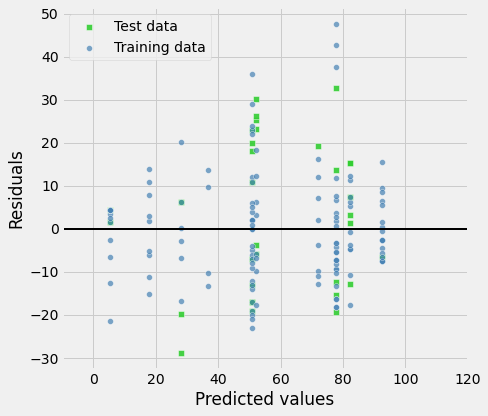

In [257]:
dtree_h(X_train, X_val, y_train, y_val, X_test, y_test )

In [171]:
dtree_hn(X_train_n, X_val_n, y_train_n, y_val_n, X_test_n, y_test_n )

MSE train: 17.479, val: 179.618
R^2 train: 0.981, val: 0.732


MSE train: 126.202, val: 160.054
R^2 train: 0.863, val: 0.762


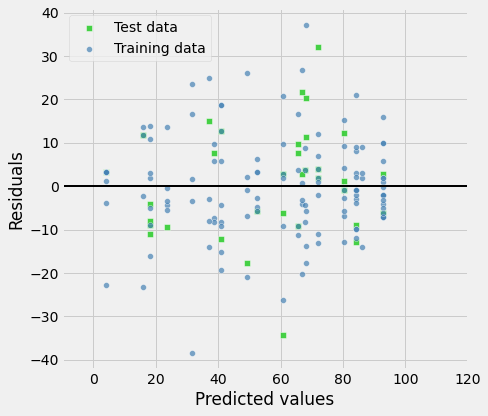

In [255]:
dtree_hr(X_train_r, X_val_r, y_train_r, y_val_r, X_test_r, y_test_r )

In [248]:
def gbr(X_train, X_val, y_train, y_val, X_test, y_test ):

    #val
    reg = GradientBoostingRegressor()
    reg.fit(X_train, y_train)
    y_train_pred=reg.predict(X_train)
    y_val_pred=reg.predict(X_val)
    #test
    #y_test_pred=reg.predict(X_test)
    
    print('MAE train: %.3f, val: %.3f' % (mean_absolute_error(y_train, y_train_pred),mean_absolute_error(y_val, y_val_pred)))
    #print('MSE test: %.3f' % mean_squared_error(y_test, y_test_pred))
    
    print('R^2 train: %.3f, val: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_val, y_val_pred)))
    
#     mse_tr3.append(mean_squared_error(y_train, y_train_pred))
#     mse_te3.append(mean_squared_error(y_val, y_val_pred))
#     rsq_tr3.append(r2_score(y_train, y_train_pred))
#     rsq_te3.append(r2_score(y_val, y_val_pred))

In [252]:
def gbr_h(X_train, X_val, y_train, y_val, X_test, y_test ):

    params = {'learning_rate': 0.03, 'max_depth': 4, 'n_estimators': 500, 'subsample': 0.5}
    
    #val
    reg = GradientBoostingRegressor(**params)
    reg.fit(X_train, y_train)
    y_train_pred=reg.predict(X_train)
    y_val_pred=reg.predict(X_val)
    #test
    #y_test_pred=reg.predict(X_test)
    
    print('MSE train: %.3f, val: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_val, y_val_pred)))
    #print('MSE test: %.3f' % mean_squared_error(y_test, y_test_pred))
    
    print('R^2 train: %.3f, val: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_val, y_val_pred)))
    
#     mse_tr3.append(mean_squared_error(y_train, y_train_pred))
#     mse_te3.append(mean_squared_error(y_val, y_val_pred))
#     rsq_tr3.append(r2_score(y_train, y_train_pred))
#     rsq_te3.append(r2_score(y_val, y_val_pred))

#     feature_importances = reg.feature_importances_
#     sorted_idxs = np.argsort(feature_importances)[:5]
#     poss = np.arange(sorted_idxs.shape[0]) + 0.5
#     fig = plt.figure(figsize=(6, 7))
#     plt.subplot(1, 2, 1)
#     plt.barh(poss, feature_importances[sorted_idxs], align="center")
#     plt.yticks(poss, np.array(best.columns)[sorted_idxs])
#     plt.title("Feature Importance (MDI)")    
    
    fig = plt.figure(figsize=(7, 6))

    plt.scatter(y_val_pred,  
                y_val_pred - y_val, 
                c='limegreen',
                edgecolor='white',
                marker='s', 
                s=35,
                alpha=0.9,
                label='Test data')
    plt.scatter(y_train_pred,  
                y_train_pred - y_train, 
                c='steelblue',
                edgecolor='white',
                marker='o', 
                s=35,
                alpha=0.7,
                label='Training data')
    plt.xlabel('Predicted values')
    plt.ylabel('Residuals')
    plt.legend(loc='upper left')
    plt.hlines(y=0, xmin=-10, xmax=120, lw=2, color='black')
    plt.xlim([-10, 120])
    plt.tight_layout()

    #plt.savefig('GBR.png', dpi=300)
    plt.show()    


In [131]:
def gbr_hr(X_train, X_val, y_train, y_val, X_test, y_test ):

    params = {'criterion': 'mae', 'max_depth': 6, 'max_features': 'auto', 'n_estimators': 100}
    
    #val
    reg = GradientBoostingRegressor(**params)
    reg.fit(X_train, y_train)
    y_train_pred=reg.predict(X_train)
    y_val_pred=reg.predict(X_val)
    #test
    #y_test_pred=reg.predict(X_test)
    
    print('MSE train: %.3f, val: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_val, y_val_pred)))
    #print('MSE test: %.3f' % mean_squared_error(y_test, y_test_pred))
    
    print('R^2 train: %.3f, val: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_val, y_val_pred)))
    
#     mse_tr3.append(mean_squared_error(y_train, y_train_pred))
#     mse_te3.append(mean_squared_error(y_val, y_val_pred))
#     rsq_tr3.append(r2_score(y_train, y_train_pred))
#     rsq_te3.append(r2_score(y_val, y_val_pred))

#     feature_importances = reg.feature_importances_
#     sorted_idxs = np.argsort(feature_importances)[:5]
#     poss = np.arange(sorted_idxs.shape[0]) + 0.5
#     fig = plt.figure(figsize=(6, 7))
#     plt.subplot(1, 2, 1)
#     plt.barh(poss, feature_importances[sorted_idxs], align="center")
#     plt.yticks(poss, np.array(best.columns)[sorted_idxs])
#     plt.title("Feature Importance (MDI)")    
    
#     fig = plt.figure(figsize=(7, 6))

#     plt.scatter(y_val_pred,  
#                 y_val_pred - y_val, 
#                 c='limegreen',
#                 edgecolor='white',
#                 marker='s', 
#                 s=35,
#                 alpha=0.9,
#                 label='Test data')
#     plt.scatter(y_train_pred,  
#                 y_train_pred - y_train, 
#                 c='steelblue',
#                 edgecolor='white',
#                 marker='o', 
#                 s=35,
#                 alpha=0.2,
#                 label='Training data')
#     plt.xlabel('Predicted values')
#     plt.ylabel('Residuals')
#     plt.legend(loc='upper left')
#     plt.hlines(y=0, xmin=-10, xmax=120, lw=2, color='black')
#     plt.xlim([-10, 120])
#     plt.tight_layout()

#     #plt.savefig('GBR.png', dpi=300)
#     plt.show()    


In [132]:
def gbr_hn(X_train, X_val, y_train, y_val, X_test, y_test ):

    params = {'learning_rate': 0.03, 'max_depth': 4, 'n_estimators': 1500, 'subsample': 0.2}
    
    #val
    reg = GradientBoostingRegressor(**params)
    reg.fit(X_train, y_train)
    y_train_pred=reg.predict(X_train)
    y_val_pred=reg.predict(X_val)
    #test
    #y_test_pred=reg.predict(X_test)
    
    print('MSE train: %.3f, val: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_val, y_val_pred)))
    #print('MSE test: %.3f' % mean_squared_error(y_test, y_test_pred))
    
    print('R^2 train: %.3f, val: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_val, y_val_pred)))
    
#     mse_tr3.append(mean_squared_error(y_train, y_train_pred))
#     mse_te3.append(mean_squared_error(y_val, y_val_pred))
#     rsq_tr3.append(r2_score(y_train, y_train_pred))
#     rsq_te3.append(r2_score(y_val, y_val_pred))

#     feature_importances = reg.feature_importances_
#     sorted_idxs = np.argsort(feature_importances)[:5]
#     poss = np.arange(sorted_idxs.shape[0]) + 0.5
#     fig = plt.figure(figsize=(6, 7))
#     plt.subplot(1, 2, 1)
#     plt.barh(poss, feature_importances[sorted_idxs], align="center")
#     plt.yticks(poss, np.array(best.columns)[sorted_idxs])
#     plt.title("Feature Importance (MDI)")    
    
#     fig = plt.figure(figsize=(7, 6))

#     plt.scatter(y_val_pred,  
#                 y_val_pred - y_val, 
#                 c='limegreen',
#                 edgecolor='white',
#                 marker='s', 
#                 s=35,
#                 alpha=0.9,
#                 label='Test data')
#     plt.scatter(y_train_pred,  
#                 y_train_pred - y_train, 
#                 c='steelblue',
#                 edgecolor='white',
#                 marker='o', 
#                 s=35,
#                 alpha=0.2,
#                 label='Training data')
#     plt.xlabel('Predicted values')
#     plt.ylabel('Residuals')
#     plt.legend(loc='upper left')
#     plt.hlines(y=0, xmin=-10, xmax=120, lw=2, color='black')
#     plt.xlim([-10, 120])
#     plt.tight_layout()

#     #plt.savefig('GBR.png', dpi=300)
#     plt.show()    


In [249]:
gbr(X_train, X_val, y_train, y_val, X_test, y_test )

MAE train: 6.200, val: 8.475
R^2 train: 0.852, val: 0.727


In [250]:
gbr(X_train_n, X_val_n, y_train_n, y_val_n, X_test_n, y_test_n )

MAE train: 6.853, val: 9.221
R^2 train: 0.840, val: 0.701


In [251]:
gbr(X_train_r, X_val_r, y_train_r, y_val_r, X_test_r, y_test_r )

MAE train: 6.200, val: 8.450
R^2 train: 0.852, val: 0.728


MSE train: 0.056, val: 93.206
R^2 train: 1.000, val: 0.861


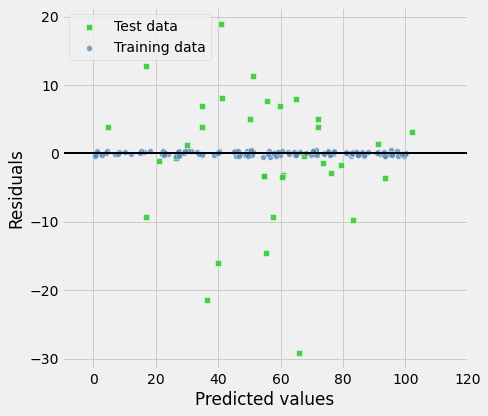

In [253]:
gbr_h(X_train, X_val, y_train, y_val, X_test, y_test )

In [134]:
gbr_hn(X_train_n, X_val_n, y_train_n, y_val_n, X_test_n, y_test_n )

MSE train: 0.017, val: 90.685
R^2 train: 1.000, val: 0.865


In [135]:
gbr_hr(X_train_r, X_val_r, y_train_r, y_val_r, X_test_r, y_test_r )

/Users/Lucy/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:1854: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). The correct way of minimizing the absolute error is to use  loss='absolute_error' instead.
  warnings.warn(
/Users/Lucy/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/Users/Lucy/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/Users/Lucy/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_er

/Users/Lucy/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/Users/Lucy/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/Users/Lucy/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/Users/Lucy/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/Users/Lucy/opt/anac

/Users/Lucy/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/Users/Lucy/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/Users/Lucy/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/Users/Lucy/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/Users/Lucy/opt/anac

MSE train: 0.000, val: 110.488
R^2 train: 1.000, val: 0.835


In [47]:
from sklearn.svm import SVR

In [252]:
def svr(X_train, X_val, y_train, y_val, X_test, y_test ):

    #val
    reg = SVR(kernel="poly")
    reg.fit(X_train, y_train)
    y_train_pred=reg.predict(X_train)
    y_val_pred=reg.predict(X_val)
    #test
    #y_test_pred=reg.predict(X_test)
    
    print('MAE train: %.3f, val: %.3f' % (mean_absolute_error(y_train, y_train_pred),mean_absolute_error(y_val, y_val_pred)))
    #print('MSE test: %.3f' % mean_squared_error(y_test, y_test_pred))
    
    print('R^2 train: %.3f, val: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_val, y_val_pred)))
    
#     mse_tr3.append(mean_squared_error(y_train, y_train_pred))
#     mse_te3.append(mean_squared_error(y_val, y_val_pred))
#     rsq_tr3.append(r2_score(y_train, y_train_pred))
#     rsq_te3.append(r2_score(y_val, y_val_pred))
    

In [136]:
def svr_h(X_train, X_val, y_train, y_val, X_test, y_test ):

    params = {'C': 100, 'gamma': 1, 'kernel': 'rbf'}
    
    #val
    reg = SVR(**params)
    reg.fit(X_train, y_train)
    y_train_pred=reg.predict(X_train)
    y_val_pred=reg.predict(X_val)
    #test
    #y_test_pred=reg.predict(X_test)
    
    print('MSE train: %.3f, val: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_val, y_val_pred)))
    #print('MSE test: %.3f' % mean_squared_error(y_test, y_test_pred))
    
    print('R^2 train: %.3f, val: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_val, y_val_pred)))
    
#     mse_tr3.append(mean_squared_error(y_train, y_train_pred))
#     mse_te3.append(mean_squared_error(y_val, y_val_pred))
#     rsq_tr3.append(r2_score(y_train, y_train_pred))
#     rsq_te3.append(r2_score(y_val, y_val_pred))

#     feature_importances = reg.feature_importances_
#     sorted_idxs = np.argsort(feature_importances)[:5]
#     poss = np.arange(sorted_idxs.shape[0]) + 0.5
#     fig = plt.figure(figsize=(6, 7))
#     plt.subplot(1, 2, 1)
#     plt.barh(poss, feature_importances[sorted_idxs], align="center")
#     plt.yticks(poss, np.array(best.columns)[sorted_idxs])
#     plt.title("Feature Importance (MDI)")    
    
#     fig = plt.figure(figsize=(7, 6))

#     plt.scatter(y_val_pred,  
#                 y_val_pred - y_val, 
#                 c='limegreen',
#                 edgecolor='white',
#                 marker='s', 
#                 s=35,
#                 alpha=0.9,
#                 label='Test data')
#     plt.scatter(y_train_pred,  
#                 y_train_pred - y_train, 
#                 c='steelblue',
#                 edgecolor='white',
#                 marker='o', 
#                 s=35,
#                 alpha=0.2,
#                 label='Training data')
#     plt.xlabel('Predicted values')
#     plt.ylabel('Residuals')
#     plt.legend(loc='upper left')
#     plt.hlines(y=0, xmin=-10, xmax=120, lw=2, color='black')
#     plt.xlim([-10, 120])
#     plt.tight_layout()

#     #plt.savefig('GBR.png', dpi=300)
#     plt.show()    


In [250]:
def svr_hr(X_train, X_val, y_train, y_val, X_test, y_test ):

    params = {'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}
    
    #val
    reg = SVR(**params)
    reg.fit(X_train, y_train)
    y_train_pred=reg.predict(X_train)
    y_val_pred=reg.predict(X_val)
    #test
    #y_test_pred=reg.predict(X_test)
    
    print('MSE train: %.3f, val: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_val, y_val_pred)))
    #print('MSE test: %.3f' % mean_squared_error(y_test, y_test_pred))
    
    print('R^2 train: %.3f, val: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_val, y_val_pred)))
    
#     mse_tr3.append(mean_squared_error(y_train, y_train_pred))
#     mse_te3.append(mean_squared_error(y_val, y_val_pred))
#     rsq_tr3.append(r2_score(y_train, y_train_pred))
#     rsq_te3.append(r2_score(y_val, y_val_pred))

#     feature_importances = reg.feature_importances_
#     sorted_idxs = np.argsort(feature_importances)[:5]
#     poss = np.arange(sorted_idxs.shape[0]) + 0.5
#     fig = plt.figure(figsize=(6, 7))
#     plt.subplot(1, 2, 1)
#     plt.barh(poss, feature_importances[sorted_idxs], align="center")
#     plt.yticks(poss, np.array(best.columns)[sorted_idxs])
#     plt.title("Feature Importance (MDI)")    
    
    fig = plt.figure(figsize=(7, 6))

    plt.scatter(y_val_pred,  
                y_val_pred - y_val, 
                c='limegreen',
                edgecolor='white',
                marker='s', 
                s=35,
                alpha=0.9,
                label='Test data')
    plt.scatter(y_train_pred,  
                y_train_pred - y_train, 
                c='steelblue',
                edgecolor='white',
                marker='o', 
                s=35,
                alpha=0.7,
                label='Training data')
    plt.xlabel('Predicted values')
    plt.ylabel('Residuals')
    plt.legend(loc='upper left')
    plt.hlines(y=0, xmin=-10, xmax=120, lw=2, color='black')
    plt.xlim([-10, 120])
    plt.tight_layout()

    #plt.savefig('GBR.png', dpi=300)
    plt.show()    


In [138]:
def svr_hn(X_train, X_val, y_train, y_val, X_test, y_test ):

    params = {'C': 0.1, 'gamma': 0.0001, 'kernel': 'rbf'}
    
    #val
    reg = SVR(**params)
    reg.fit(X_train, y_train)
    y_train_pred=reg.predict(X_train)
    y_val_pred=reg.predict(X_val)
    #test
    #y_test_pred=reg.predict(X_test)
    
    print('MSE train: %.3f, val: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_val, y_val_pred)))
    #print('MSE test: %.3f' % mean_squared_error(y_test, y_test_pred))
    
    print('R^2 train: %.3f, val: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_val, y_val_pred)))
    
#     mse_tr3.append(mean_squared_error(y_train, y_train_pred))
#     mse_te3.append(mean_squared_error(y_val, y_val_pred))
#     rsq_tr3.append(r2_score(y_train, y_train_pred))
#     rsq_te3.append(r2_score(y_val, y_val_pred))

#     feature_importances = reg.feature_importances_
#     sorted_idxs = np.argsort(feature_importances)[:5]
#     poss = np.arange(sorted_idxs.shape[0]) + 0.5
#     fig = plt.figure(figsize=(6, 7))
#     plt.subplot(1, 2, 1)
#     plt.barh(poss, feature_importances[sorted_idxs], align="center")
#     plt.yticks(poss, np.array(best.columns)[sorted_idxs])
#     plt.title("Feature Importance (MDI)")    
    
#     fig = plt.figure(figsize=(7, 6))

#     plt.scatter(y_val_pred,  
#                 y_val_pred - y_val, 
#                 c='limegreen',
#                 edgecolor='white',
#                 marker='s', 
#                 s=35,
#                 alpha=0.9,
#                 label='Test data')
#     plt.scatter(y_train_pred,  
#                 y_train_pred - y_train, 
#                 c='steelblue',
#                 edgecolor='white',
#                 marker='o', 
#                 s=35,
#                 alpha=0.2,
#                 label='Training data')
#     plt.xlabel('Predicted values')
#     plt.ylabel('Residuals')
#     plt.legend(loc='upper left')
#     plt.hlines(y=0, xmin=-10, xmax=120, lw=2, color='black')
#     plt.xlim([-10, 120])
#     plt.tight_layout()

#     #plt.savefig('GBR.png', dpi=300)
#     plt.show()    


In [253]:
svr(X_train, X_val, y_train, y_val, X_test, y_test )

MAE train: 17.121, val: 17.621
R^2 train: -0.060, val: -0.069


In [254]:
svr(X_train_n, X_val_n, y_train_n, y_val_n, X_test_n, y_test_n )

MAE train: 17.171, val: 17.683
R^2 train: -0.062, val: -0.072


In [255]:
svr(X_train_r, X_val_r, y_train_r, y_val_r, X_test_r, y_test_r )

MAE train: 16.784, val: 17.303
R^2 train: -0.013, val: -0.026


In [139]:
svr_h(X_train, X_val, y_train, y_val, X_test, y_test )

MSE train: 0.010, val: 675.608
R^2 train: 1.000, val: -0.006


In [140]:
svr_hn(X_train_n, X_val_n, y_train_n, y_val_n, X_test_n, y_test_n )

MSE train: 949.911, val: 719.206
R^2 train: -0.030, val: -0.071


MSE train: 1.097, val: 74.416
R^2 train: 0.999, val: 0.889


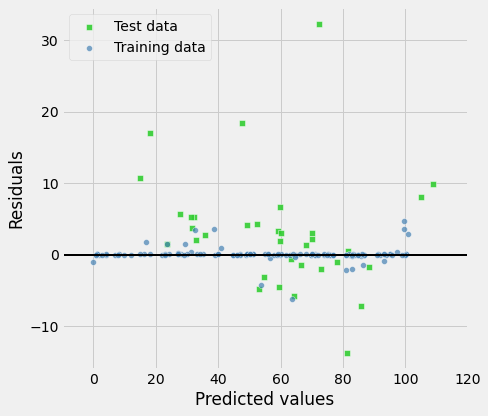

In [251]:
svr_hr(X_train_r, X_val_r, y_train_r, y_val_r, X_test_r, y_test_r )

In [256]:
def rf(X_train, X_val, y_train, y_val, X_test, y_test ):

    #val
    reg = RandomForestRegressor()
    reg.fit(X_train, y_train)
    y_train_pred=reg.predict(X_train)
    y_val_pred=reg.predict(X_val)
    #test
    #y_test_pred=reg.predict(X_test)
    
    print('MAE train: %.3f, val: %.3f' % (mean_absolute_error(y_train, y_train_pred),mean_absolute_error(y_val, y_val_pred)))
    #print('MSE test: %.3f' % mean_squared_error(y_test, y_test_pred))
    
    print('R^2 train: %.3f, val: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_val, y_val_pred)))
    
#     mse_tr3.append(mean_squared_error(y_train, y_train_pred))
#     mse_te3.append(mean_squared_error(y_val, y_val_pred))
#     rsq_tr3.append(r2_score(y_train, y_train_pred))
#     rsq_te3.append(r2_score(y_val, y_val_pred))

In [176]:
def rf_h(X_train, X_val, y_train, y_val, X_test, y_test ):
    
    params = {'criterion': 'absolute_error', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 500}
    #val
    reg = RandomForestRegressor(**params)
    reg.fit(X_train, y_train)
    y_train_pred=reg.predict(X_train)
    y_val_pred=reg.predict(X_val)
    #test
    #y_test_pred=reg.predict(X_test)
    
    print('MSE train: %.3f, val: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_val, y_val_pred)))
    #print('MSE test: %.3f' % mean_squared_error(y_test, y_test_pred))
    
    print('R^2 train: %.3f, val: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_val, y_val_pred)))
    
#     mse_tr3.append(mean_squared_error(y_train, y_train_pred))
#     mse_te3.append(mean_squared_error(y_val, y_val_pred))
#     rsq_tr3.append(r2_score(y_train, y_train_pred))
#     rsq_te3.append(r2_score(y_val, y_val_pred))

#     feature_importances = reg.feature_importances_
#     sorted_idxs = np.argsort(feature_importances)[:5]
#     poss = np.arange(sorted_idxs.shape[0]) + 0.5
#     fig = plt.figure(figsize=(6, 7))
#     plt.subplot(1, 2, 1)
#     plt.barh(poss, feature_importances[sorted_idxs], align="center")
#     plt.yticks(poss, np.array(best.columns)[sorted_idxs])
#     plt.title("Feature Importance (MDI)")    
    
#     fig = plt.figure(figsize=(7, 6))

#     plt.scatter(y_val_pred,  
#                 y_val_pred - y_val, 
#                 c='limegreen',
#                 edgecolor='white',
#                 marker='s', 
#                 s=35,
#                 alpha=0.9,
#                 label='Test data')
#     plt.scatter(y_train_pred,  
#                 y_train_pred - y_train, 
#                 c='steelblue',
#                 edgecolor='white',
#                 marker='o', 
#                 s=35,
#                 alpha=0.2,
#                 label='Training data')
#     plt.xlabel('Predicted values')
#     plt.ylabel('Residuals')
#     plt.legend(loc='upper left')
#     plt.hlines(y=0, xmin=-10, xmax=120, lw=2, color='black')
#     plt.xlim([-10, 120])
#     plt.tight_layout()

#     #plt.savefig('GBR.png', dpi=300)
#     plt.show()    


In [177]:
def rf_hr(X_train, X_val, y_train, y_val, X_test, y_test ):
    
    params = {'criterion': 'absolute_error', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 100}
    #val
    reg = RandomForestRegressor(**params)
    reg.fit(X_train, y_train)
    y_train_pred=reg.predict(X_train)
    y_val_pred=reg.predict(X_val)
    #test
    #y_test_pred=reg.predict(X_test)
    
    print('MSE train: %.3f, val: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_val, y_val_pred)))
    #print('MSE test: %.3f' % mean_squared_error(y_test, y_test_pred))
    
    print('R^2 train: %.3f, val: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_val, y_val_pred)))
    
#     mse_tr3.append(mean_squared_error(y_train, y_train_pred))
#     mse_te3.append(mean_squared_error(y_val, y_val_pred))
#     rsq_tr3.append(r2_score(y_train, y_train_pred))
#     rsq_te3.append(r2_score(y_val, y_val_pred))

#     feature_importances = reg.feature_importances_
#     sorted_idxs = np.argsort(feature_importances)[:5]
#     poss = np.arange(sorted_idxs.shape[0]) + 0.5
#     fig = plt.figure(figsize=(6, 7))
#     plt.subplot(1, 2, 1)
#     plt.barh(poss, feature_importances[sorted_idxs], align="center")
#     plt.yticks(poss, np.array(best.columns)[sorted_idxs])
#     plt.title("Feature Importance (MDI)")    
    
#     fig = plt.figure(figsize=(7, 6))

#     plt.scatter(y_val_pred,  
#                 y_val_pred - y_val, 
#                 c='limegreen',
#                 edgecolor='white',
#                 marker='s', 
#                 s=35,
#                 alpha=0.9,
#                 label='Test data')
#     plt.scatter(y_train_pred,  
#                 y_train_pred - y_train, 
#                 c='steelblue',
#                 edgecolor='white',
#                 marker='o', 
#                 s=35,
#                 alpha=0.2,
#                 label='Training data')
#     plt.xlabel('Predicted values')
#     plt.ylabel('Residuals')
#     plt.legend(loc='upper left')
#     plt.hlines(y=0, xmin=-10, xmax=120, lw=2, color='black')
#     plt.xlim([-10, 120])
#     plt.tight_layout()

#     #plt.savefig('GBR.png', dpi=300)
#     plt.show()    


In [246]:
def rf_hn(X_train, X_val, y_train, y_val, X_test, y_test ):
    
    params = {'criterion': 'squared_error', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 500}
    #val
    reg = RandomForestRegressor(**params)
    reg.fit(X_train, y_train)
    y_train_pred=reg.predict(X_train)
    y_val_pred=reg.predict(X_val)
    #test
    #y_test_pred=reg.predict(X_test)
    
    print('MSE train: %.3f, val: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_val, y_val_pred)))
    #print('MSE test: %.3f' % mean_squared_error(y_test, y_test_pred))
    
    print('R^2 train: %.3f, val: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_val, y_val_pred)))
    
#     mse_tr3.append(mean_squared_error(y_train, y_train_pred))
#     mse_te3.append(mean_squared_error(y_val, y_val_pred))
#     rsq_tr3.append(r2_score(y_train, y_train_pred))
#     rsq_te3.append(r2_score(y_val, y_val_pred))

#     feature_importances = reg.feature_importances_
#     sorted_idxs = np.argsort(feature_importances)[:5]
#     poss = np.arange(sorted_idxs.shape[0]) + 0.5
#     fig = plt.figure(figsize=(6, 7))
#     plt.subplot(1, 2, 1)
#     plt.barh(poss, feature_importances[sorted_idxs], align="center")
#     plt.yticks(poss, np.array(features.columns)[sorted_idxs])
#     plt.title("Feature Importance (MDI)")    
    
    fig = plt.figure(figsize=(7, 6))

    plt.scatter(y_val_pred,  
                y_val_pred - y_val, 
                c='limegreen',
                edgecolor='white',
                marker='s', 
                s=35,
                alpha=0.9,
                label='Test data')
    plt.scatter(y_train_pred,  
                y_train_pred - y_train, 
                c='steelblue',
                edgecolor='white',
                marker='o', 
                s=35,
                alpha=0.6,
                label='Training data')
    plt.xlabel('Predicted values')
    plt.ylabel('Residuals')
    plt.legend(loc='upper left')
    plt.hlines(y=0, xmin=-10, xmax=120, lw=2, color='black')
    plt.xlim([-10, 120])
    plt.tight_layout()

    #plt.savefig('GBR.png', dpi=300)
    plt.show()    


In [257]:
rf(X_train, X_val, y_train, y_val, X_test, y_test )

MAE train: 3.049, val: 8.466
R^2 train: 0.960, val: 0.716


In [258]:
rf(X_train_n, X_val_n, y_train_n, y_val_n, X_test_n, y_test_n )

MAE train: 3.398, val: 8.813
R^2 train: 0.956, val: 0.717


In [259]:
rf(X_train_r, X_val_r, y_train_r, y_val_r, X_test_r, y_test_r )

MAE train: 3.050, val: 8.370
R^2 train: 0.961, val: 0.719


In [179]:
rf_h(X_train, X_val, y_train, y_val, X_test, y_test )

MSE train: 14.817, val: 134.870
R^2 train: 0.984, val: 0.799


MSE train: 11.510, val: 94.832
R^2 train: 0.988, val: 0.859


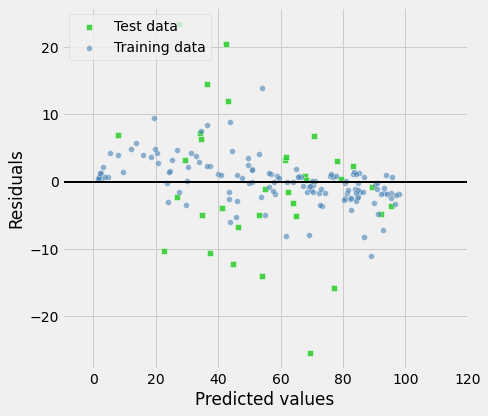

In [247]:
rf_hn(X_train_n, X_val_n, y_train_n, y_val_n, X_test_n, y_test_n )

In [181]:
rf_hr(X_train_r, X_val_r, y_train_r, y_val_r, X_test_r, y_test_r )

MSE train: 15.692, val: 141.718
R^2 train: 0.983, val: 0.789


In [18]:
#reg
nam=['Ada Boost','Decision Tree','Gradient Boost', 'SVM', 'Random Forest']
same=[12.65,15.49,11.94,23.48,12.27]
norm=[16.23,19.16,15.48,24.13,15.01]
stand=[13.45,16.13,12.21,24.12,12.41]
x = np.arange(len(nam))  # the label locations
width = 0.2  # the width of the bars

# fig, ax = plt.subplots()
# plt.figure(figsize=(50,10))
# rects1 = ax.bar(x - width/2, same, width, label='Original')
# rects2 = ax.bar(x + width/2, norm, width, label='Normalize')
# rects3 = ax.bar(x + 3*width/2, stand, width, label='Standardize')

# # Add some text for labels, title and custom x-axis tick labels, etc.
# ax.set_ylabel('MAE')
# ax.set_title('MAE by Model Testing')
# ax.set_xticks(x, nam)
# ax.legend()
import plotly.graph_objects as go
import plotly.graph_objects as px
  
plot = px.Figure(data=[go.Bar(
    name = 'Original',
    x = nam,
    y = same
   ),
                       go.Bar(
    name = 'Normalize',
    x = nam,
    y = norm
   ),
                       go.Bar(
    name = 'Standardize',
    x = nam,
    y = stand
   )
                       
])
# plot.update_xaxes('Models')
# plot.update_yaxes('MAE')
# plot.update
# , title="MAE on Testing Set"
plot.update_layout(
    title="MAE on Testing Set",
    xaxis_title="Models",
    yaxis_title="MAE",
    
    
    )
plot.show()
# ax.bar_label(rects1, padding=10)
# ax.bar_label(rects2, padding=10)
# ax.bar_label(rects3, padding=10)

#fig.tight_layout()

#plt.show()

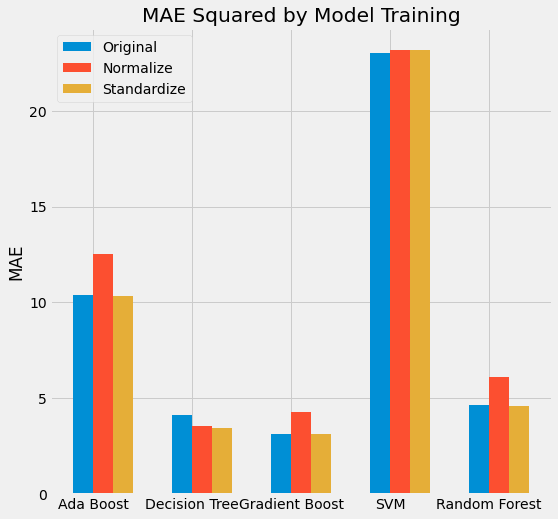

<Figure size 3600x720 with 0 Axes>

In [196]:
#r2
same=[10.37, 4.11,3.12,23.00,4.66]
norm=[12.50,3.56,4.27,23.16,6.13]
stand=[10.33,3.43,3.12,23.14,4.61]
x = np.arange(len(nam))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots()
plt.figure(figsize=(50,10))
rects1 = ax.bar(x - width/2, same, width, label='Original')
rects2 = ax.bar(x + width/2, norm, width, label='Normalize')
rects3 = ax.bar(x + 3*width/2, stand, width, label='Standardize')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('MAE')
ax.set_title('MAE Squared by Model Training')
ax.set_xticks(x, nam)
ax.legend()

# ax.bar_label(rects1, padding=10)
# ax.bar_label(rects2, padding=10)
# ax.bar_label(rects3, padding=10)

#fig.tight_layout()

plt.show()

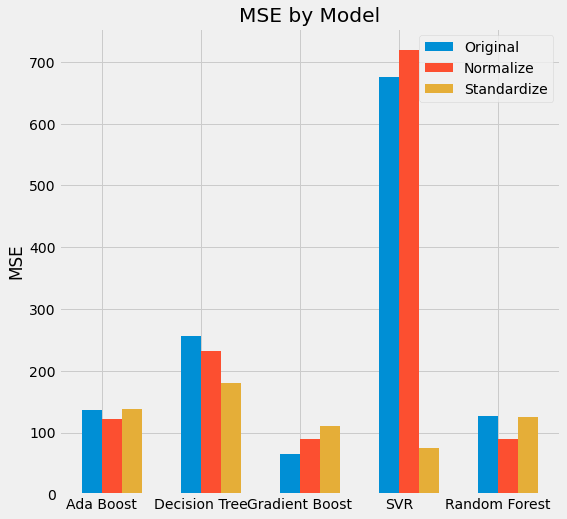

<Figure size 3600x720 with 0 Axes>

In [200]:
#hyper
same=[136.76,256.92,64.66, 675.61,125.99]
norm=[122.33,232.58,90.25,719.21,89.53]
stand=[137.70,179.62,110.49,74.42,125.71]
x = np.arange(len(nam))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots()
plt.figure(figsize=(50,10))
rects1 = ax.bar(x - width/2, same, width, label='Original')
rects2 = ax.bar(x + width/2, norm, width, label='Normalize')
rects3 = ax.bar(x + 3*width/2, stand, width, label='Standardize')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('MSE')
ax.set_title('MSE by Model')
ax.set_xticks(x, nam)
ax.legend()

# ax.bar_label(rects1, padding=10)
# ax.bar_label(rects2, padding=10)
# ax.bar_label(rects3, padding=10)

#fig.tight_layout()

plt.show()

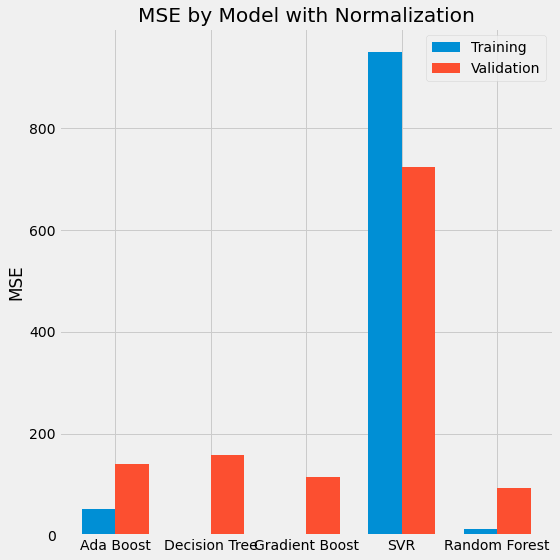

In [199]:
rtr2=[round(num,2) for num in mse_tr2]
rte2=[round(num,2) for num in mse_te2]

x = np.arange(len(nam))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, rtr2, width, label='Training')
rects2 = ax.bar(x + width/2, rte2, width, label='Validation')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('MSE')
ax.set_title('MSE by Model with Normalization')
ax.set_xticks(x, nam)
ax.legend()

#ax.bar_label(rects1, padding=3)
#ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

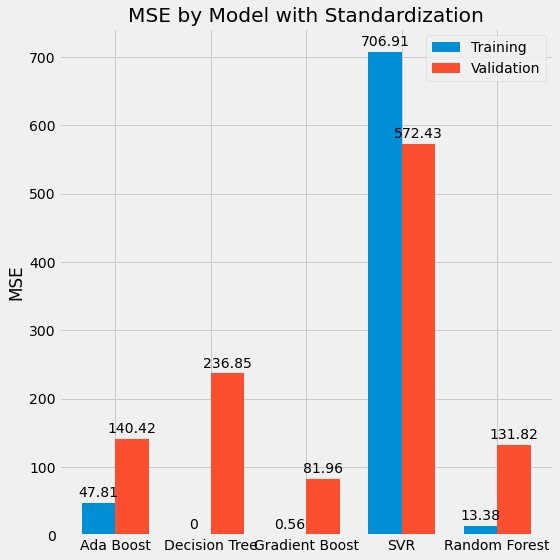

In [158]:
rtr3=[round(num,2) for num in mse_tr3]
rte3=[round(num,2) for num in mse_te3]

x = np.arange(len(nam))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, rtr3, width, label='Training')
rects2 = ax.bar(x + width/2, rte3, width, label='Validation')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('MSE')
ax.set_title('MSE by Model with Standardization')
ax.set_xticks(x, nam)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

In [157]:
# Define Data
rtr1=[round(num,2) for num in mse_tr1]
rte1=[round(num,2) for num in mse_te1]


rtr2=[round(num,2) for num in mse_tr2]
rte2=[round(num,2) for num in mse_te2]


rtr3=[round(num,2) for num in mse_tr3]
rte3=[round(num,2) for num in mse_te3]


x = np.arange(len(nam)
width = 0.4

# Draw first subplot

plt.subplot(1, 2, 1)
plt.bar(x - width/2, rtr1, width, label='Training')
plt.bar(x + width/2, rte1, width, label='Validation')

# Draw second subplot

plt.subplot(1, 2, 2)
plt.bar(x - width/2, rtr2, width, label='Training')
plt.bar(x + width/2, rte2, width, label='Validation')

              
# plt.subplot(1, 2, 3)
# plt.bar(x - width/2, rtr3, width, label='Training')
# plt.bar(x + width/2, rte3, width, label='Validation')
# Display

plt.show()

SyntaxError: invalid syntax (3669484822.py, line 15)

HYPERPARAMETER TUNING

In [169]:
from sklearn.metrics import make_scorer
scorer = make_scorer(mean_absolute_error, greater_is_better=False)

In [174]:
parameters = {'learning_rate': [0.01,0.02,0.03,0.04],
                  'subsample'    : [0.9, 0.5, 0.2, 0.1],
                  'n_estimators' : [100,500,1000, 1500],
                  'max_depth'    : [4,6,8,10]
                 }
GBR = GradientBoostingRegressor()
grid_GBR = GridSearchCV(estimator=GBR, param_grid = parameters, cv = 2, n_jobs=-1)
grid_GBR.fit(X_train, y_train)
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_GBR.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_GBR.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_GBR.best_params_)

KeyboardInterrupt: 

In [ ]:
parameters = {'learning_rate': [0.01,0.02,0.03,0.04],
                  'subsample'    : [0.9, 0.5, 0.2, 0.1],
                  'n_estimators' : [100,500,1000, 1500],
                  'max_depth'    : [4,6,8,10]
                 }
GBR = GradientBoostingRegressor()
grid_GBR = GridSearchCV(estimator=GBR, param_grid = parameters, cv = 2, n_jobs=-1)
grid_GBR.fit(X_train_r, y_train_r)
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_GBR.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_GBR.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_GBR.best_params_)

In [ ]:
parameters = {'learning_rate': [0.01,0.02,0.03,0.04],
                  'subsample'    : [0.9, 0.5, 0.2, 0.1],
                  'n_estimators' : [100,500,1000, 1500],
                  'max_depth'    : [4,6,8,10]
                 }
GBR = GradientBoostingRegressor()
grid_GBR = GridSearchCV(estimator=GBR, param_grid = parameters, cv = 2, n_jobs=-1)
grid_GBR.fit(X_train_n, y_train_n)
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_GBR.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_GBR.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_GBR.best_params_)

In [ ]:
parameters = {"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90]}
GBR = DecisionTreeRegressor()
grid_GBR = GridSearchCV(estimator=GBR, param_grid = parameters, cv = 2, n_jobs=-1)
grid_GBR.fit(X_train, y_train)
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_GBR.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_GBR.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_GBR.best_params_)

In [ ]:
parameters = {"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90]}
GBR = DecisionTreeRegressor()
grid_GBR = GridSearchCV(estimator=GBR, param_grid = parameters, cv = 2, n_jobs=-1)
grid_GBR.fit(X_train_r, y_train_r)
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_GBR.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_GBR.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_GBR.best_params_)

In [ ]:
parameters = {"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90]}
GBR = DecisionTreeRegressor()
grid_GBR = GridSearchCV(estimator=GBR, param_grid = parameters, cv = 2, n_jobs=-1)
grid_GBR.fit(X_train_n, y_train_n)
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_GBR.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_GBR.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_GBR.best_params_)

In [ ]:
parameters = {
   'n_estimators': [100, 200, 500],
   'max_features': ['auto', 'sqrt', 'log2'],
   'max_depth' : [4,5,6,7,8],
   'criterion' :['squared_error', 'absolute_error']
}

GBR = RandomForestRegressor()
grid_GBR = GridSearchCV(estimator=GBR, param_grid = parameters, cv = 2, n_jobs=-1)
grid_GBR.fit(X_train, y_train)
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_GBR.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_GBR.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_GBR.best_params_)

In [ ]:
parameters = {
   'n_estimators': [100, 200, 500],
   'max_features': ['auto', 'sqrt', 'log2'],
   'max_depth' : [4,5,6,7,8],
   'criterion' :['squared_error', 'absolute_error']
}

GBR = RandomForestRegressor()
grid_GBR = GridSearchCV(estimator=GBR, param_grid = parameters, cv = 2, n_jobs=-1)
grid_GBR.fit(X_train_r, y_train_r)
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_GBR.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_GBR.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_GBR.best_params_)

In [ ]:
parameters = {
   'n_estimators': [100, 200, 500],
   'max_features': ['auto', 'sqrt', 'log2'],
   'max_depth' : [4,5,6,7,8],
   'criterion' :['squared_error', 'absolute_error']
}

GBR = RandomForestRegressor()
grid_GBR = GridSearchCV(estimator=GBR, param_grid = parameters, cv = 2, n_jobs=-1)
grid_GBR.fit(X_train_n, y_train_n)
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_GBR.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_GBR.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_GBR.best_params_)

In [ ]:
parameters = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
GBR = SVR()
grid_GBR = GridSearchCV(estimator=GBR, param_grid = parameters, cv = 2, n_jobs=-1)
grid_GBR.fit(X_train, y_train)
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_GBR.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_GBR.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_GBR.best_params_)

In [ ]:
parameters = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
GBR = SVR()
grid_GBR = GridSearchCV(estimator=GBR, param_grid = parameters, cv = 2, n_jobs=-1)
grid_GBR.fit(X_train_r, y_train_r)
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_GBR.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_GBR.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_GBR.best_params_)

In [ ]:
parameters = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
GBR = SVR()
grid_GBR = GridSearchCV(estimator=GBR, param_grid = parameters, cv = 2, n_jobs=-1)
grid_GBR.fit(X_train_n, y_train_n)
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_GBR.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_GBR.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_GBR.best_params_)

In [ ]:
parameters = {
 'n_estimators': [50, 100],
 'learning_rate' : [0.01, 0.05, 0.1, 0.5],
 'loss' : ['linear', 'square', 'exponential']
 }
GBR = AdaBoostRegressor()
grid_GBR = GridSearchCV(estimator=GBR, param_grid = parameters, cv = 2, n_jobs=-1)
grid_GBR.fit(X_train, y_train)
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_GBR.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_GBR.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_GBR.best_params_)

In [ ]:
parameters = {
 'n_estimators': [50, 100],
 'learning_rate' : [0.01, 0.05, 0.1, 0.5],
 'loss' : ['linear', 'square', 'exponential']
 }
GBR = AdaBoostRegressor()
grid_GBR = GridSearchCV(estimator=GBR, param_grid = parameters, cv = 2, n_jobs=-1)
grid_GBR.fit(X_train_r, y_train_r)
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_GBR.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_GBR.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_GBR.best_params_)

In [ ]:
parameters = {
 'n_estimators': [50, 100],
 'learning_rate' : [0.01, 0.05, 0.1, 0.5],
 'loss' : ['linear', 'square', 'exponential']
 }
GBR = AdaBoostRegressor()
grid_GBR = GridSearchCV(estimator=GBR, param_grid = parameters, cv = 2, n_jobs=-1)
grid_GBR.fit(X_train_n, y_train_n)
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_GBR.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_GBR.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_GBR.best_params_)

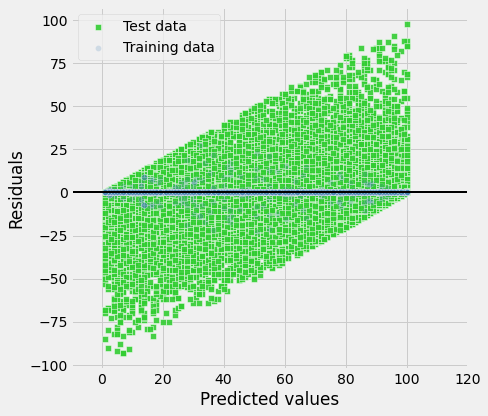

In [135]:
fig = plt.figure(figsize=(7, 6))

plt.scatter(y_val_pred,  
            y_val_pred - y_val, 
            c='limegreen',
            edgecolor='white',
            marker='s', 
            s=35,
            alpha=0.9,
            label='Test data')
plt.scatter(y_train_pred,  
            y_train_pred - y_train, 
            c='steelblue',
            edgecolor='white',
            marker='o', 
            s=35,
            alpha=0.2,
            label='Training data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=120, lw=2, color='black')
plt.xlim([-10, 120])
plt.tight_layout()

#plt.savefig('GBR.png', dpi=300)
plt.show()    

In [ ]:
feature_importance = regressor.feature_importances_
sorted_idx = np.argsort(feature_importance)[:6]
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(5, 7))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(features.columns)[sorted_idx])
plt.title("Feature Importance (MDI)")


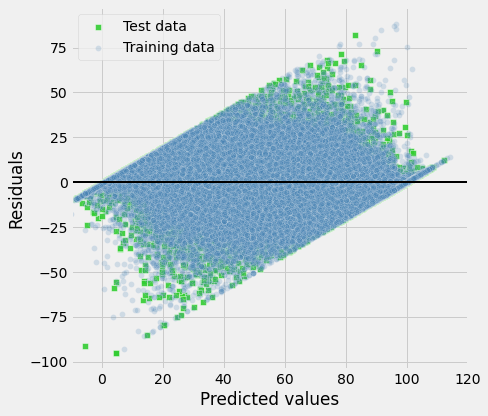

In [138]:
fig = plt.figure(figsize=(7, 6))

plt.scatter(y_val_pred,  
            y_val_pred - y_val, 
            c='limegreen',
            edgecolor='white',
            marker='s', 
            s=35,
            alpha=0.9,
            label='Test data')
plt.scatter(y_train_pred,  
            y_train_pred - y_train, 
            c='steelblue',
            edgecolor='white',
            marker='o', 
            s=35,
            alpha=0.2,
            label='Training data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=120, lw=2, color='black')
plt.xlim([-10, 120])
plt.tight_layout()

#plt.savefig('GBR.png', dpi=300)
plt.show()    